# *Step1*:Data preprocessing

##step1-1: importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Step 1-2: Importing the main dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##step 1-3: encoding categorical variables

In [ ]:
pip install category_encoders

     |████████████████████████████████| 82 kB 317 kB/s 


In [ ]:
import category_encoders as ce
import pandas as pd

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Geography','Gender'],return_df=True,mapping=[{'col':'Geography','mapping':{'France':1,'Spain':2,'Germany':3}},{'col':'Gender','mapping':{'Female':1,'Male':2}}])
dataset_encode = encoder.fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## step 1-4: ballancing main dataset

In [ ]:
X = dataset_encode.iloc[:, 3:13].values
y = dataset_encode.iloc[:, -1].values
#X, y= smote_nc.fit_resample(X, y)

In [ ]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,619.0,1.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,1.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,1.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1.0,2.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,1.0,2.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,1.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,3.0,2.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


##step 1-5: standardizing the varaibles for clustering 

In [ ]:
X1=X.drop([1, 2,3,4,6,7,8,9], axis=1)
X1

,0,5
0,619.0,0.00
1,608.0,83807.86
2,502.0,159660.80
3,699.0,0.00
4,850.0,125510.82
...,...,...
9995,771.0,0.00
9996,516.0,57369.61
9997,709.0,0.00
9998,772.0,75075.31


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data_scaled = min_max.fit(X1)
data_scaled = data_scaled.transform(X1)
#data_scaled = pd.DataFrame(data_scaled, columns=X1.columns)
data_scaled

#QUESTION: why does the second column change?

array([[0.538     , 0.        ],
       [0.516     , 0.33403148],
       [0.304     , 0.63635718],
       ...,
       [0.718     , 0.        ],
       [0.844     , 0.29922631],
       [0.884     , 0.51870777]])

# **step2: clustering**

## step 2-1: Drawing the dendrogram

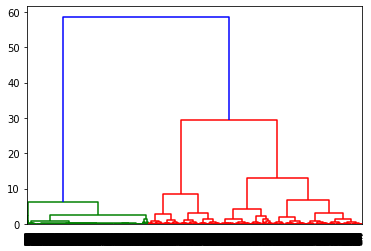

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))

## Step 2-2: Using the dendrogram to find the optimal number of clusters

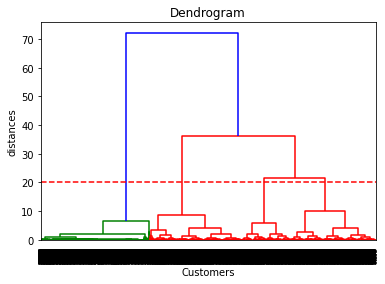

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

## step 2-3: predicting the cluster for each observation

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_scaled)

## step 2-4: merging and reordering dataset for classification

In [ ]:
dataset_classification = dataset_encode.iloc[:,3:14].values
df1=pd.DataFrame(X)
df2=pd.DataFrame(y_hc.reshape(len(y_hc),1))
df1 = df1.rename(columns={0: 'credit',1:'Geography',2:'gender',3:'age',4:'tenure',5:'balance',6:'num_prod',7:'has_credit',8:'is_active',9:'estimated_salary',10:'Exited'})
df2 = df2.rename(columns={0: 'cluster'})
result = pd.concat([df1, df2], axis=1)
cols=result.columns.tolist()
cols=cols[-1:]+cols[:-1]
dataset_classification=result[cols]

NameError: ignored

In [ ]:
dataset_classification

,cluster,credit,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
0,0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.880000
1,3,608.0,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.580000
2,2,502.0,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.570000
3,0,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.630000
4,2,850.0,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.100000
...,...,...,...,...,...,...,...,...,...
15921,5,516.0,41.0,2.0,82018.721647,1.0,0.0,1.0,178098.858879
15922,0,414.0,44.0,8.0,0.000000,1.0,0.0,0.0,76396.632678
15923,3,453.0,34.0,9.0,114702.962572,1.0,1.0,1.0,115266.127506
15924,2,646.0,44.0,2.0,109217.597873,1.0,0.0,0.0,67981.343581


## K-means clustering


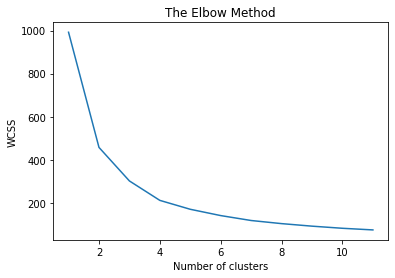

In [ ]:
from sklearn.cluster import KMeans
#data_scaled=data_scaled.drop([6,7],axis=1)
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)

In [ ]:
df1=pd.DataFrame(X)
df2=pd.DataFrame(y_kmeans.reshape(len(y_kmeans),1))
df1 = df1.rename(columns={0: 'credit',1:'Geography',2:'gender',3:'age',4:'tenure',5:'balance',6:'num_prod',7:'has_credit',8:'is_active',9:'estimated_salary',10:'Exited'})
df2 = df2.rename(columns={0: 'cluster'})
result = pd.concat([df1, df2], axis=1)
cols=result.columns.tolist()
cols=cols[-1:]+cols[:-1]
dataset_classification=result[cols]

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_classification, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

,cluster,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
2967,1,579.0,3.0,1.0,39.0,5.0,117833.30,3.0,0.0,0.0,5831.00
700,0,750.0,1.0,1.0,32.0,5.0,0.00,2.0,1.0,0.0,95611.47
3481,0,729.0,2.0,1.0,34.0,9.0,53299.96,2.0,1.0,1.0,42855.97
1621,3,689.0,2.0,2.0,38.0,5.0,75075.14,1.0,1.0,1.0,8651.92
800,2,605.0,1.0,2.0,52.0,7.0,0.00,2.0,1.0,1.0,173952.50
...,...,...,...,...,...,...,...,...,...,...,...
9225,1,594.0,3.0,1.0,32.0,4.0,120074.97,2.0,1.0,1.0,162961.79
4859,3,794.0,2.0,1.0,22.0,4.0,114440.24,1.0,1.0,1.0,107753.07
3264,3,738.0,1.0,2.0,35.0,5.0,161274.05,2.0,1.0,0.0,181429.87
9845,2,590.0,2.0,1.0,38.0,9.0,0.00,2.0,1.0,1.0,148750.16


In [ ]:
#SMOTE on training set
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
over = SMOTENC(categorical_features=[0,1,2,3,4,5,7,8,9], random_state=0,sampling_strategy=0.6)
X_train, y_train= over.fit_resample(X_train, y_train)

In [ ]:
#dont run
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: ignored

In [ ]:
X_train
len(y_train)

9555

In [ ]:
#allocatign the dataset to sub clusters
X_train_cluster1=X_train[X_train.cluster==0]
y_train_cluster1=y_train[X_train.cluster==0]
X_train_cluster2=X_train[X_train.cluster==1]
y_train_cluster2=y_train[X_train.cluster==1]
X_train_cluster3=X_train[X_train.cluster==2]
y_train_cluster3=y_train[X_train.cluster==2]
X_train_cluster4=X_train[X_train.cluster==3]
y_train_cluster4=y_train[X_train.cluster==3]


X_test_cluster1=X_test[X_test.cluster==0]
y_test_cluster1=y_test[X_test.cluster==0]
X_test_cluster2=X_test[X_test.cluster==1]
y_test_cluster2=y_test[X_test.cluster==1]
X_test_cluster3=X_test[X_test.cluster==2]
y_test_cluster3=y_test[X_test.cluster==2]
X_test_cluster4=X_test[X_test.cluster==3]
y_test_cluster4=y_test[X_test.cluster==3]

# **step 3: classification**

## step 3-1: classification without clustering

In [ ]:
X_WoC_train=X_train.drop(['cluster'], axis=1)
X_WoC_test=X_test.drop(['cluster'], axis=1)
y_WoC_train=y_train
y_WoC_test=y_test

In [ ]:
X_WoC_train

,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
0,579.0,3.0,1.0,39.0,5.0,117833.300000,3.0,0.0,0.0,5831.000000
1,750.0,1.0,1.0,32.0,5.0,0.000000,2.0,1.0,0.0,95611.470000
2,729.0,2.0,1.0,34.0,9.0,53299.960000,2.0,1.0,1.0,42855.970000
3,689.0,2.0,2.0,38.0,5.0,75075.140000,1.0,1.0,1.0,8651.920000
4,605.0,1.0,2.0,52.0,7.0,0.000000,2.0,1.0,1.0,173952.500000
...,...,...,...,...,...,...,...,...,...,...
9550,680.0,1.0,1.0,37.0,5.0,118913.586206,1.0,1.0,0.0,82758.319190
9551,598.0,3.0,2.0,38.0,8.0,104812.509097,1.0,1.0,1.0,78026.370581
9552,549.0,3.0,1.0,51.0,1.0,136518.365099,2.0,0.0,0.0,102991.461182
9553,730.0,2.0,1.0,47.0,6.0,0.000000,1.0,1.0,0.0,50618.718424


In [ ]:
#DONT RUN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_WoC_train = sc.fit_transform(X_WoC_train)
X_WoC_test = sc.transform(X_WoC_test)

### step 3-1-1: linear regression


step 3-1-1-1:fitting linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_WoC_train, y_WoC_train)

LogisticRegression(random_state=0)

step 3-1-1-2:make the prediction with linear regression

In [ ]:
y_WoC_pred = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred.reshape(len(y_WoC_pred),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


step 3-1-1-3:performance measure for linear regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_WoC_test, y_WoC_pred)
print(cm)
print(accuracy_score(y_WoC_test, y_WoC_pred))
print(precision_score(y_WoC_test, y_WoC_pred, average='binary'))
print(recall_score(y_WoC_test, y_WoC_pred))
print(f1_score(y_WoC_test, y_WoC_pred))

[[1690  301]
 [ 311  198]]
0.7552
0.3967935871743487
0.3889980353634578
0.39285714285714285


Feature: 0, Score: -0.00439
Feature: 1, Score: 0.00200
Feature: 2, Score: -0.00120
Feature: 3, Score: 0.05398
Feature: 4, Score: -0.00284
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00123
Feature: 7, Score: 0.00001
Feature: 8, Score: -0.00141
Feature: 9, Score: -0.00000


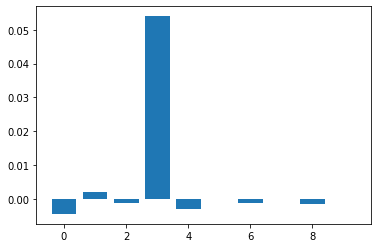

In [ ]:
from matplotlib import pyplot
importance = classifier.coef_[0]
importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

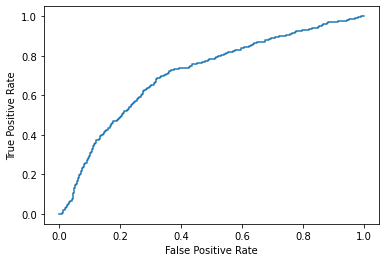

In [ ]:
y_WoC_pred = classifier.predict_proba(X_WoC_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred)
plt.plot(fpr_LR,tpr_LR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### step 3-1-2: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_WoC_train, y_WoC_train)

GaussianNB()

In [ ]:
y_WoC_pred_NB = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred_NB.reshape(len(y_WoC_pred_NB),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_WoC_test, y_WoC_pred_NB)
print(cm)
accuracy_score(y_WoC_test, y_WoC_pred_NB)

[[1361  630]
 [ 147  362]]


0.6892

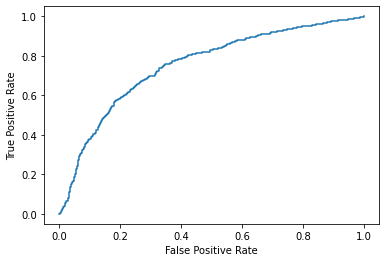

In [ ]:
y_WoC_pred_NB = classifier.predict_proba(X_WoC_test)[::,1]
fpr_NB, tpr_NB, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_NB)
plt.plot(fpr_NB,tpr_NB)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### step 3-1-3: Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[20,30,40,50,60,70,80,90,100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
classifier = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier.fit(X_WoC_train, y_WoC_train)

KeyboardInterrupt: ignored

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
classifier.best_params_
#classifier.best_score_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10, n_estimators = 70, criterion = 'entropy', random_state = 0)
classifier.fit(X_WoC_train, y_WoC_train)

In [ ]:
y_WoC_pred_RF = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred_RF.reshape(len(y_WoC_pred_RF),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_WoC_test, y_WoC_pred_RF)
print(cm)
accuracy_score(y_WoC_test, y_WoC_pred_RF)

[[1626  365]
 [ 132  377]]


0.8012

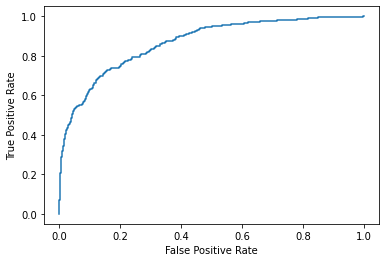

In [ ]:
y_WoC_pred_RF = classifier.predict_proba(X_WoC_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_RF)
plt.plot(fpr_RF,tpr_RF)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### step 3-1-4: XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid={'max_depth':[3,6,9,12,15,18,21]}
classifier = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier.fit(X_WoC_train, y_WoC_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 21]})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
classifier.best_params_


{'max_depth': 18}

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=18)
y_WoC_pred_XG=xgb.fit(X_WoC_train, y_WoC_train).predict(X_WoC_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_WoC_pred_XG = xgb.predict(X_WoC_test)
cm = confusion_matrix(y_WoC_test, y_WoC_pred_XG)
print(cm)
accuracy_score(y_WoC_test, y_WoC_pred_XG)

[[1673  318]
 [ 153  356]]


0.8116

In [ ]:
y_WoC_pred_XG = classifier.predict_proba(X_WoC_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_XG)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: ignored

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool
param_grid={'iterations':[5,10,15,20,30,40,50,60,70,80], 'depth':[2,3,4,5,6,7,8,9,10]}
classifier = GridSearchCV(estimator=CatBoostClassifier(),param_grid=param_grid)   
classifier.fit(X_WoC_train, y_WoC_train)

Streaming output truncated to the last 5000 lines.
45:	learn: 0.3474215	total: 236ms	remaining: 71.7ms
46:	learn: 0.3453769	total: 240ms	remaining: 66.5ms
47:	learn: 0.3438888	total: 245ms	remaining: 61.3ms
48:	learn: 0.3411525	total: 250ms	remaining: 56.1ms
49:	learn: 0.3382800	total: 255ms	remaining: 51ms
50:	learn: 0.3373981	total: 260ms	remaining: 45.8ms
51:	learn: 0.3361426	total: 264ms	remaining: 40.7ms
52:	learn: 0.3344149	total: 269ms	remaining: 35.5ms
53:	learn: 0.3316560	total: 279ms	remaining: 31ms
54:	learn: 0.3305884	total: 287ms	remaining: 26.1ms
55:	learn: 0.3293648	total: 291ms	remaining: 20.8ms
56:	learn: 0.3277381	total: 296ms	remaining: 15.6ms
57:	learn: 0.3264787	total: 301ms	remaining: 10.4ms
58:	learn: 0.3241297	total: 306ms	remaining: 5.18ms
59:	learn: 0.3214396	total: 311ms	remaining: 0us
Learning rate set to 0.356392
0:	learn: 0.5879677	total: 5.27ms	remaining: 311ms
1:	learn: 0.5342298	total: 10.3ms	remaining: 299ms
2:	learn: 0.5028718	total: 15.3ms	remaining:

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f4d63a06790>,
             param_grid={'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'iterations': [5, 10, 15, 20, 30, 40, 50, 60, 70, 80]})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
classifier.best_params_

{'depth': 10, 'iterations': 80}

In [ ]:
from catboost import CatBoostClassifier, Pool
from catboost import CatBoostClassifier, Pool
model = CatBoostClassifier(iterations=80,
                           depth=10,
                           verbose=True)
model.fit(X_WoC_train, y_WoC_train)

Learning rate set to 0.301123
0:	learn: 0.6071870	total: 14.5ms	remaining: 1.14s
1:	learn: 0.5501287	total: 34.6ms	remaining: 1.35s
2:	learn: 0.5140584	total: 48.3ms	remaining: 1.24s
3:	learn: 0.4862305	total: 62.2ms	remaining: 1.18s
4:	learn: 0.4671124	total: 75.6ms	remaining: 1.13s
5:	learn: 0.4517887	total: 89.2ms	remaining: 1.1s
6:	learn: 0.4396256	total: 103ms	remaining: 1.07s
7:	learn: 0.4285703	total: 121ms	remaining: 1.09s
8:	learn: 0.4196721	total: 136ms	remaining: 1.08s
9:	learn: 0.4125282	total: 150ms	remaining: 1.05s
10:	learn: 0.4055748	total: 168ms	remaining: 1.05s
11:	learn: 0.4010034	total: 182ms	remaining: 1.03s
12:	learn: 0.3958446	total: 196ms	remaining: 1.01s
13:	learn: 0.3932729	total: 211ms	remaining: 997ms
14:	learn: 0.3883489	total: 225ms	remaining: 977ms
15:	learn: 0.3849249	total: 239ms	remaining: 956ms
16:	learn: 0.3819569	total: 255ms	remaining: 946ms
17:	learn: 0.3803293	total: 259ms	remaining: 893ms
18:	learn: 0.3776354	total: 277ms	remaining: 889ms
19:	le

In [ ]:
y_WoC_pred_CB = model.predict(X_WoC_test)
cm = confusion_matrix(y_WoC_test, y_WoC_pred_CB)
print(cm)
accuracy_score(y_WoC_test, y_WoC_pred_CB)

[[1638  343]
 [ 301 1700]]


0.8382722250125565

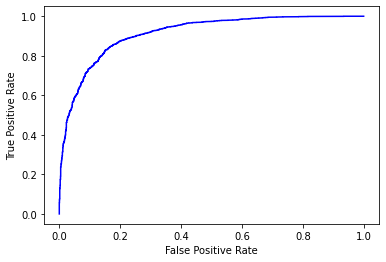

In [ ]:
y_WoC_pred_CB= classifier.predict_proba(X_WoC_test)[::,1]
fpr_CB, tpr_CB, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_CB)
plt.plot(fpr_CB,tpr_CB,"b")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 3-2:classification with clustering 

In [ ]:
# excluding clusters label from main dataset
X_train_cluster1=X_train_cluster1.drop(['cluster'],axis=1)
X_train_cluster2=X_train_cluster2.drop(['cluster'],axis=1)
X_train_cluster3=X_train_cluster3.drop(['cluster'],axis=1)
X_train_cluster4=X_train_cluster4.drop(['cluster'],axis=1)

X_test_cluster1=X_test_cluster1.drop(['cluster'],axis=1)
X_test_cluster2=X_test_cluster2.drop(['cluster'],axis=1)
X_test_cluster3=X_test_cluster3.drop(['cluster'],axis=1)
X_test_cluster4=X_test_cluster4.drop(['cluster'],axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_cluster1 = sc.fit_transform(X_train_cluster1)
X_test_cluster1 = sc.transform(X_test_cluster1)

X_train_cluster2 = sc.fit_transform(X_train_cluster2)
X_test_cluster2 = sc.transform(X_test_cluster2)

X_train_cluster3 = sc.fit_transform(X_train_cluster3)
X_test_cluster3 = sc.transform(X_test_cluster3)

X_train_cluster4 = sc.fit_transform(X_train_cluster4)
X_test_cluster4 = sc.transform(X_test_cluster4)

In [ ]:
X_test_cluster4

,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
2398,706.0,2.0,1.0,42.0,8.0,95386.82,1.0,1.0,1.0,75732.25
5906,788.0,1.0,2.0,32.0,4.0,112079.58,1.0,0.0,0.0,89368.59
2343,706.0,3.0,2.0,38.0,5.0,163034.82,2.0,1.0,1.0,135662.17
8225,670.0,2.0,1.0,57.0,3.0,175575.95,2.0,1.0,0.0,99061.75
1819,714.0,2.0,2.0,45.0,8.0,150900.29,2.0,0.0,1.0,139889.15
...,...,...,...,...,...,...,...,...,...,...
1267,837.0,3.0,2.0,38.0,2.0,126732.85,1.0,1.0,1.0,79577.38
8764,773.0,3.0,2.0,51.0,8.0,116197.65,2.0,1.0,1.0,86701.40
2041,840.0,1.0,1.0,39.0,1.0,94968.97,1.0,1.0,0.0,84487.62
1108,679.0,3.0,2.0,38.0,7.0,110555.37,2.0,1.0,0.0,46522.68


### step 3-2-1: linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train_cluster1, y_train_cluster1)

classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train_cluster2, y_train_cluster2)

classifier3 = LogisticRegression(random_state = 0)
classifier3.fit(X_train_cluster3, y_train_cluster3)

classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train_cluster4, y_train_cluster4)



LogisticRegression(random_state=0)

In [ ]:
y_pred1 = classifier1.predict(X_test_cluster1)
y_pred2 = classifier2.predict(X_test_cluster2)
y_pred3 = classifier3.predict(X_test_cluster3)
y_pred4 = classifier4.predict(X_test_cluster4)

#print(np.concatenate((y_WC_pred.reshape(len(y_WC_pred),1), y_WC_test.reshape(len(y_WC_test),1)),1))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm1 = confusion_matrix(y_test_cluster1, y_pred1)
cm2 = confusion_matrix(y_test_cluster2, y_pred2)
cm3 = confusion_matrix(y_test_cluster3, y_pred3)
cm4 = confusion_matrix(y_test_cluster4, y_pred4)
print(cm1+cm2+cm3+cm4)



#print(accuracy_score(y_WC_test, y_WC_pred))
#print(precision_score(y_WC_test, y_WC_pred, average='binary'))
#print(recall_score(y_WC_test, y_WC_pred))
#print(f1_score(y_WC_test, y_WC_pred))

[[1608  383]
 [ 227  282]]


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

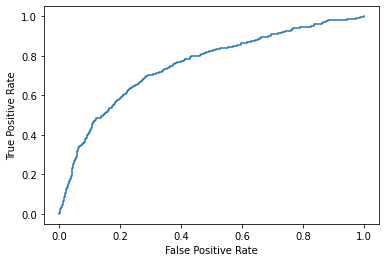

In [ ]:
y_WC_pred = classifier.predict_proba(X_WC_test)[::,1]
fpr_LR_C, tpr_LR_C, _ = metrics.roc_curve(y_WC_test,  y_WC_pred)
plt.plot(fpr_LR_C,tpr_LR_C)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### step 3-2-2: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier_nb1 = GaussianNB()
classifier_nb1.fit(X_train_cluster1, y_train_cluster1)

classifier_nb2 = GaussianNB()
classifier_nb2.fit(X_train_cluster2, y_train_cluster2)

classifier_nb3 = GaussianNB()
classifier_nb3.fit(X_train_cluster3, y_train_cluster3)

classifier_nb4 = GaussianNB()
classifier_nb4.fit(X_train_cluster4, y_train_cluster4)

GaussianNB()

In [ ]:
y_pred_NB1 = classifier_nb1.predict(X_test_cluster1)
y_pred_NB2 = classifier_nb2.predict(X_test_cluster2)
y_pred_NB3 = classifier_nb3.predict(X_test_cluster3)
y_pred_NB4 = classifier_nb4.predict(X_test_cluster4)

#print(np.concatenate((y_WC_pred_NB.reshape(len(y_WC_pred_NB),1), y_WC_test.reshape(len(y_WC_test),1)),1))

In [ ]:
cm1 = confusion_matrix(y_test_cluster1, y_pred_NB1)
cm2 = confusion_matrix(y_test_cluster2, y_pred_NB2)
cm3 = confusion_matrix(y_test_cluster3, y_pred_NB3)
cm4 = confusion_matrix(y_test_cluster4, y_pred_NB4)
print(cm1+cm2+cm3+cm4)


#print(cm)
#accuracy_score(y_WC_test, y_WC_pred_NB)

[[1400  591]
 [ 158  351]]


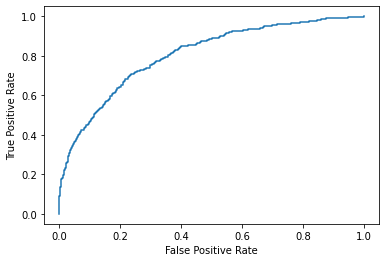

In [ ]:
y_WC_pred_NB = classifier.predict_proba(X_WC_test)[::,1]
fpr_NB_C, tpr_NB_C, _ = metrics.roc_curve(y_WC_test,  y_WC_pred_NB)
plt.plot(fpr_NB_C,tpr_NB_C)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### step 3-2-2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[20,30,40,50,60,70,80,90,100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
classifier1 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier1.fit(X_train_cluster1, y_train_cluster1)

classifier2 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier2.fit(X_train_cluster2, y_train_cluster2)

classifier3 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier3.fit(X_train_cluster3, y_train_cluster3)

classifier4 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier4.fit(X_train_cluster4, y_train_cluster4)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]})

In [ ]:
classifier1.cv_results_
print(classifier1.best_params_)
classifier2.cv_results_
print(classifier2.best_params_)
classifier3.cv_results_
print(classifier3.best_params_)
classifier4.cv_results_
print(classifier4.best_params_)


#df=pd.DataFrame(classifier.cv_results_)
#df[['params','mean_test_score']]

#classifier.best_score_

{'max_depth': 10, 'n_estimators': 100}
{'max_depth': 10, 'n_estimators': 80}
{'max_depth': 10, 'n_estimators': 80}
{'max_depth': 10, 'n_estimators': 30}


In [ ]:
classifier1 = RandomForestClassifier(max_depth=10, n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train_cluster1, y_train_cluster1)

classifier2 = RandomForestClassifier(max_depth=10, n_estimators = 80, criterion = 'entropy', random_state = 0)
classifier2.fit(X_train_cluster2, y_train_cluster2)

classifier3 = RandomForestClassifier(max_depth=10, n_estimators = 80, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train_cluster3, y_train_cluster3)

classifier4 = RandomForestClassifier(max_depth=10, n_estimators = 30, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train_cluster4, y_train_cluster4)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=30,
                       random_state=0)

In [ ]:
y_pred_RF1 = classifier1.predict(X_test_cluster1)
y_pred_RF2 = classifier2.predict(X_test_cluster2)
y_pred_RF3 = classifier3.predict(X_test_cluster3)
y_pred_RF4 = classifier4.predict(X_test_cluster4)



#print(np.concatenate((y_WC_pred_RF.reshape(len(y_WC_pred_RF),1), y_WC_test.reshape(len(y_WC_test),1)),1))

In [ ]:
cm1 = confusion_matrix(y_test_cluster1, y_pred_RF1)
cm2 = confusion_matrix(y_test_cluster2, y_pred_RF2)
cm3 = confusion_matrix(y_test_cluster3, y_pred_RF3)
cm4 = confusion_matrix(y_test_cluster4, y_pred_RF4)
print(cm1+cm2+cm3+cm4)

#print(cm)
#accuracy_score(y_WC_test, y_WC_pred_RF)

[[1653  338]
 [ 147  362]]


In [ ]:
y_WC_pred_RF = classifier.predict_proba(X_WC_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_WC_test,  y_WC_pred_RF)
plt.plot(fpr_RF,tpr_RF)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### step 3-2-4: XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid={'max_depth':[3,6,9,12,15,18,21]}
classifier1 = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier1.fit(X_train_cluster1, y_train_cluster1)

classifier2 = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier2.fit(X_train_cluster2, y_train_cluster2)

classifier3 = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier3.fit(X_train_cluster3, y_train_cluster3)

classifier4 = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier4.fit(X_train_cluster4, y_train_cluster4)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12, 15, 18, 21]})

In [ ]:
classifier1.cv_results_
print(classifier1.best_params_)
classifier2.cv_results_
print(classifier2.best_params_)
classifier3.cv_results_
print(classifier3.best_params_)
classifier4.cv_results_
print(classifier4.best_params_)


{'max_depth': 6}
{'max_depth': 15}
{'max_depth': 18}
{'max_depth': 18}


In [ ]:
xgb1=XGBClassifier(max_depth=6)
y_pred_XG1=xgb1.fit(X_train_cluster1, y_train_cluster1).predict(X_test_cluster1)

xgb2=XGBClassifier(max_depth=15)
y_pred_XG2=xgb2.fit(X_train_cluster2, y_train_cluster2).predict(X_test_cluster2)

xgb3=XGBClassifier(max_depth=18)
y_pred_XG3=xgb3.fit(X_train_cluster3, y_train_cluster3).predict(X_test_cluster3)

xgb4=XGBClassifier(max_depth=18)
y_pred_XG4=xgb4.fit(X_train_cluster4, y_train_cluster4).predict(X_test_cluster4)

In [ ]:
cm1 = confusion_matrix(y_test_cluster1, y_pred_XG1)
cm2 = confusion_matrix(y_test_cluster2, y_pred_XG2)
cm3 = confusion_matrix(y_test_cluster3, y_pred_XG3)
cm4 = confusion_matrix(y_test_cluster4, y_pred_XG4)
print(cm1+cm2+cm3+cm4)


[[1687  304]
 [ 169  340]]


In [ ]:
from catboost import CatBoostClassifier, Pool
param_grid={'iterations':[5,10,15,20,30,40,50,60,70,80], 'depth':[2,3,4,5,6,7,8,9,10]}
classifier = GridSearchCV(estimator=CatBoostClassifier(),param_grid=param_grid)   
classifier.fit(X_WC_train, y_WC_train)

Streaming output truncated to the last 5000 lines.
45:	learn: 0.3447881	total: 234ms	remaining: 71.3ms
46:	learn: 0.3430316	total: 239ms	remaining: 66.1ms
47:	learn: 0.3408700	total: 244ms	remaining: 61ms
48:	learn: 0.3396317	total: 249ms	remaining: 55.9ms
49:	learn: 0.3380622	total: 254ms	remaining: 50.8ms
50:	learn: 0.3369390	total: 260ms	remaining: 45.8ms
51:	learn: 0.3360223	total: 264ms	remaining: 40.7ms
52:	learn: 0.3339558	total: 269ms	remaining: 35.5ms
53:	learn: 0.3319543	total: 274ms	remaining: 30.4ms
54:	learn: 0.3303237	total: 279ms	remaining: 25.3ms
55:	learn: 0.3283026	total: 284ms	remaining: 20.3ms
56:	learn: 0.3266763	total: 288ms	remaining: 15.2ms
57:	learn: 0.3246453	total: 293ms	remaining: 10.1ms
58:	learn: 0.3231349	total: 298ms	remaining: 5.05ms
59:	learn: 0.3218792	total: 302ms	remaining: 0us
Learning rate set to 0.356392
0:	learn: 0.5889132	total: 4.92ms	remaining: 290ms
1:	learn: 0.5344892	total: 10ms	remaining: 290ms
2:	learn: 0.5012035	total: 15ms	remaining: 2

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f4d63875450>,
             param_grid={'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'iterations': [5, 10, 15, 20, 30, 40, 50, 60, 70, 80]})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
classifier.best_params_

{'depth': 10, 'iterations': 80}

In [ ]:
from catboost import CatBoostClassifier, Pool
model = CatBoostClassifier(iterations=80,
                           depth=10,
                           verbose=True)
model.fit(X_WC_train, y_WC_train)

Learning rate set to 0.301123
0:	learn: 0.6039257	total: 18.1ms	remaining: 1.43s
1:	learn: 0.5547995	total: 21.4ms	remaining: 836ms
2:	learn: 0.5149797	total: 36.2ms	remaining: 928ms
3:	learn: 0.4865007	total: 50.5ms	remaining: 960ms
4:	learn: 0.4678749	total: 65.2ms	remaining: 978ms
5:	learn: 0.4518701	total: 84.4ms	remaining: 1.04s
6:	learn: 0.4405094	total: 103ms	remaining: 1.07s
7:	learn: 0.4324418	total: 117ms	remaining: 1.06s
8:	learn: 0.4245163	total: 131ms	remaining: 1.04s
9:	learn: 0.4162026	total: 145ms	remaining: 1.02s
10:	learn: 0.4107244	total: 160ms	remaining: 1s
11:	learn: 0.4042370	total: 174ms	remaining: 984ms
12:	learn: 0.4002405	total: 187ms	remaining: 965ms
13:	learn: 0.3959116	total: 204ms	remaining: 963ms
14:	learn: 0.3938691	total: 221ms	remaining: 957ms
15:	learn: 0.3893432	total: 235ms	remaining: 940ms
16:	learn: 0.3830234	total: 253ms	remaining: 939ms
17:	learn: 0.3808365	total: 267ms	remaining: 921ms
18:	learn: 0.3790825	total: 281ms	remaining: 902ms
19:	lear

In [ ]:
y_WC_pred_CB = model.predict(X_WC_test)
cm = confusion_matrix(y_WC_test, y_WC_pred_CB)
print(cm)
accuracy_score(y_WC_test, y_WC_pred_CB)

[[1631  350]
 [ 334 1667]]


0.8282270215971873